In [27]:
import openml
from gplearn.genetic import SymbolicTransformer, SymbolicRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [28]:
dataset = openml.datasets.get_dataset(192)

X, y, _, _ = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

In [29]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.Series(y)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lugs_1989  52 non-null     float64
 1   lugs_1990  52 non-null     float64
dtypes: float64(2)
memory usage: 960.0 bytes


In [31]:
y.info()
y.describe()
y.value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: None
Non-Null Count  Dtype
--------------  -----
52 non-null     int64
dtypes: int64(1)
memory usage: 544.0 bytes


12    10
8      5
14     5
16     5
6      5
7      4
15     3
10     2
11     2
3      2
1      1
4      1
5      1
2      1
17     1
9      1
18     1
13     1
0      1
Name: count, dtype: int64

In [32]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
transformer = SymbolicTransformer(generations=20,
                                  population_size=6000,
                                  hall_of_fame=100,
                                  n_components=4,
                                  function_set=function_set,
                                  parsimony_coefficient=0.0001,
                                  max_samples=0.2  ,
                                  verbose=1,
                                  random_state=42,
                                  n_jobs=-1)

transformer.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.66         0.552004        4         0.987071         0.724503     29.59s
   1    15.17         0.640412        9         0.986658         0.750805     39.40s
   2    14.49         0.669841        4         0.988523         0.660981      1.11m
   3    14.34         0.685615       16         0.983138         0.717356     50.66s
   4    15.41         0.699342        7         0.985244          0.71881     49.62s
   5    16.43            0.709       55         0.987582         0.709474      1.01m
   6    17.63         0.717161       18         0.991823         0.758661     45.73s
   7    18.26         0.716059        7         0.993431         0.718714     44.67s
   8    18.76         0.722624       17         0.989605         0.774185  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.2, n_components=4, n_jobs=-1,
                    parsimony_coefficient=0.0001, population_size=6000,
                    random_state=42, verbose=1)

In [33]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,1.0,5.0,-0.921925,1.538194,0.654801,1.000000
1,3.0,8.0,-2.373682,1.377272,1.545375,1.071075
2,3.0,11.0,-2.365511,1.377272,1.545375,1.071075
3,3.0,9.0,-2.370562,1.377272,1.545375,1.071075
4,5.0,9.5,-3.439761,1.244659,1.974560,1.105823


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
est_gp = SymbolicRegressor(
    population_size=5000,
    generations=20,
    p_crossover=0.6,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.2,
    p_point_mutation=0.1,
    max_samples=0.5,
    function_set=function_set,
    verbose=1,
    tournament_size=20,
    parsimony_coefficient=0.001,
    stopping_criteria=0.01,
    metric='mse',
    n_jobs=-1,
    random_state=42
)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.77          5434.69        7          5.57657          14.3988      7.84s
   1    12.55           1207.7       67          4.55449          13.2348     33.92s
   2    13.92          1367.71        5           3.9091          14.7127     38.70s
   3    21.19          5657.84       10          3.13205          16.2692     40.31s
   4    33.99          468.509       65          2.68874          15.2432      1.05m
   5    46.27          357.584       77          2.67995          15.1093     41.07s
   6    52.11          3700.63       53          2.21849          15.5708     43.70s
   7    54.75           792.52       45          2.88338          16.5178     57.33s
   8    60.20          2700.72       93          2.37618          15.4131  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min'],
                  max_samples=0.5, metric='mse', n_jobs=-1, p_crossover=0.6,
                  p_hoist_mutation=0.2, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, population_size=5000, random_state=42,
                  stopping_criteria=0.01, verbose=1)

In [37]:
y_pred_train = pd.Series(est_gp.predict(X_train), index=X_train.index)
y_pred_train.head()

37     8.828957
24    12.664168
44     7.501132
33     7.463165
49     4.318140
dtype: float64

In [38]:
y_train.head()

37     8
24    14
44    12
33     6
49     3
dtype: int64

In [39]:
y_pred_test = pd.Series(est_gp.predict(X_test), index=X_test.index)
y_pred_test.head()

19    16.444626
41     8.154983
47     5.550792
12    12.270343
43     8.820482
dtype: float64

In [40]:
y_test.head()

19    14
41     6
47     4
12    15
43     8
dtype: int64

In [41]:
print("R2 Score of train samples whit the model: ", est_gp.score(X_train, y_train))
print("R2 Score of test samples whit the model: ", est_gp.score(X_test, y_test))

R2 Score of train samples whit the model:  0.5675054782280309
R2 Score of test samples whit the model:  0.7172805354454708


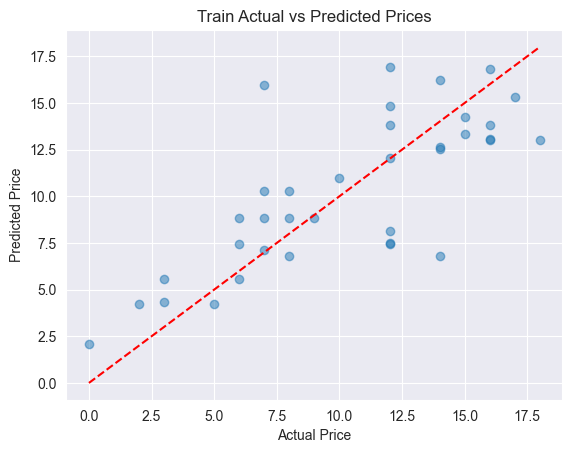

In [42]:
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Train Actual vs Predicted Prices')
plt.show()

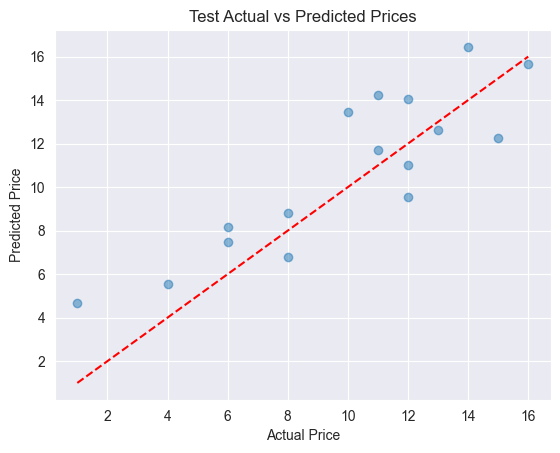

In [43]:
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test Actual vs Predicted Prices')
plt.show()